## Healthy Blood Prediction

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

This dataset was collected to help predict from a blood exam if a patient is healthy or has hepatitis C ([source](https://archive.ics.uci.edu/ml/datasets/HCV+data)). It contains the laboratory results from the blood examinations of patients and their diagnosis.

While diagnostic pathways are based on expert rules (if-then-else rules), machine learning algorithms can go beyond these methods, and learn predictions rules directly from the data.

Our goal in this exercise is to implement a logistic regression model for prediction and understand some of its properties. In the second part of this exercise you will implement all methods by yourself, **without using the sklearn library**.

For reference, you find the `sklearn` Logistic Regression at [sklearn-logreg](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

## Preparing the dataset

First, load the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('../data/blood.csv')
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


The 'Category' column indicates the health status of the patient. 

In [3]:
df["Category"].value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

#### 1. Create target variable

Create a binary variable called `healthy` that is one when the patient is a healthy (category `'0=Blood Donor'`), and zero otherwise. Inspect how many samples are healthy and how many are not, using the `value_counts()` method. 

Calculate the percentage of healthy patient in the dataset, and save it to the variable `perc_healthy`.

In [5]:
# Add your code below
df["healthy"] = df["Category"].apply(lambda x: 1 if x == "0=Blood Donor" else 0)
# ...
perc_healthy = df["healthy"].mean()


Once you have calculated `perc_healthy`, uncomment the cell below and print it out:

In [6]:
perc_healthy

np.float64(0.8666666666666667)

Note that the dataset is imbalanced, with much higher proportion of healthy samples. This imbalance makes the task harders, as there is a small number of samples from the unhealthy class to learn from.

#### Inspect the columns of the model with the 'info' method. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
 13  healthy   615 non-null    int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


#### 2. Clean the dataset 

Notice in `.info()` that the Non-Null values indicate that the dataset has missing values. Print the number of missing values for each column.

In [9]:
print(df.isnull().sum() )

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
healthy      0
dtype: int64



We must make a decision about how to correct them. Possible solutions are imputation, deletion of the problematic variables (columns) or deletion of problematic samples (rows). As there is a small number of samples with missing values (and for the sake of time), we will drop them. 

Create a clean dataframe by removing samples that have non-valid values, and save it to `df_clean`. 

Turn the categorical variable `Sex` to a valid input representation. Use a binary representation: `True` if equal to `m`, `False` otherwise.

And drop any columns that won't be used in the prediction model. Use `.info()` again to check the new dataset is clean.

*Hint: use the `dropna()` and `drop` methods.*

In [11]:
# Add your code below
# Remove rows with missing values
df_clean = df.dropna()

# Convert 'Sex' to binary: True if 'm', False otherwise
df_clean["Sex"] = df_clean["Sex"] == "m"

# Drop columns not needed for prediction (example: 'Category')
df_clean = df_clean.drop(columns=["Category"])

# Check the cleaned dataset
df_clean.info()
df_clean["Sex"].value_counts()


<class 'pandas.core.frame.DataFrame'>
Index: 589 entries, 0 to 612
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      589 non-null    int64  
 1   Sex      589 non-null    bool   
 2   ALB      589 non-null    float64
 3   ALP      589 non-null    float64
 4   ALT      589 non-null    float64
 5   AST      589 non-null    float64
 6   BIL      589 non-null    float64
 7   CHE      589 non-null    float64
 8   CHOL     589 non-null    float64
 9   CREA     589 non-null    float64
 10  GGT      589 non-null    float64
 11  PROT     589 non-null    float64
 12  healthy  589 non-null    int64  
dtypes: bool(1), float64(10), int64(2)
memory usage: 60.4 KB


C:\Users\ssmith1\AppData\Local\Temp\ipykernel_39452\204364272.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Sex"] = df_clean["Sex"] == "m"


Sex
True     363
False    226
Name: count, dtype: int64

Once you have calculated `df_clean`, uncomment and run the cell below:

In [12]:
df_clean.head(3)

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,healthy
0,32,True,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1
1,32,True,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1
2,32,True,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1


## Single variable model

We will start by analyzing a single variable column, which makes it easier to visualize the main principles of Logistic Regression. We choose the feature `AST` arbitrarily.

#### 3. Visualize how the target `healthy` depends on the variable `AST` with a scatter plot.

Use the `df.plot.scatter()` method and pass `ax=ax`, and `c=k` (color black).

Note that the `fig` and `ax` variables can be reused in cells below to plot over this figure.

<Axes: xlabel='AST', ylabel='healthy'>

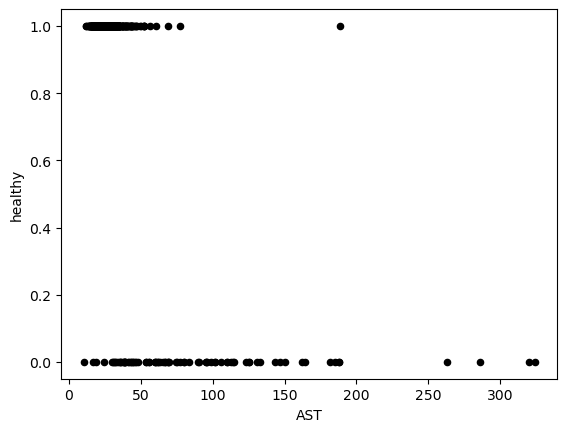

In [16]:
fig, ax = plt.subplots()
# Add your code below
df.plot.scatter(x='AST', y='healthy', ax=ax, c='k')  # 'k' stands for black color


#### 4. Implement a function that creates and fits a logistic regression model given the input and output data. 

In [17]:
# Add your code below
def logreg(X, Y):
    model = LogisticRegression()
    model.fit(X, Y)
    return model


#### 5. Fit a model named `model_AST` that predict the status `healthy` from the variable `AST`. 

Note: for the test on KATE to pass, use the dataframe `df` (and not `df_clean`) to define the input features `X` and the labels `y` to train your model `model_AST`.

In [18]:
# Add your code below
X = df[["AST"]]
y = df["healthy"]
model_AST = logreg(X, y)


#### 6. Calculate the prediction probability for each data point. 

Using `model_AST`, calculate the prediction probabilities for all data points, saved as `y_prob`. 

Plot the result using `ax.scatter()`, which will reuse the plot created above, and the command `fig` will plot the resulting figure here. Use the color blue for this new plot, using the argument `color='tab:blue'`. 

Note: the `tab` colors are the new standard matplotlib colors (the "Tableau Palette").

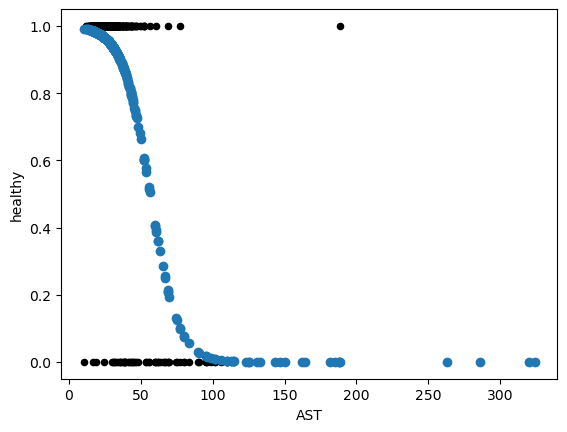

In [19]:
# Add your code below
# Add your code below
Y_prob = model_AST.predict_proba(X)[:, 1]
ax.scatter(X["AST"], Y_prob, color='tab:blue', label='Predicted Probability')
fig

#### 7. Calculate the deterministic predictions. 

Calculate the deterministic predictions, deciding that it is healthy if the output probability is larger than 50%, in a variable `y_pred`. 

Plot the predictions for each data point, again superimposed on the results above using `ax.scatter()`. Use small red markers, using the arguments `c=tab:red` and `marker='.'`.

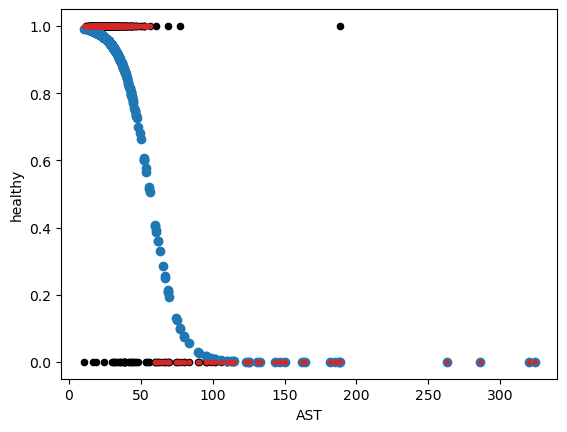

In [20]:
# Add your code below
y_pred = (Y_prob > 0.5).astype(int)
ax.scatter(X["AST"], y_pred, color='tab:red', marker='.')
fig

#### 8. Notice that your model is deciding a sample is healthy if `ALS` is below a certain threhold. Calculate this threshold from the bias and weight parameters of the model. 
 
Draw the threshold as a vertical line, superimposed on the plots above using `ax.plot()`, and again in the color red. 

Note that this line represents a decision boundary: the model's decision is based on which side of it a sample lies.

*Hint: use the `model.intercept_` and `model.coef_` attributes as bias and weight attributes respectively, and that at the decision bourdary we have $w x - b = 0$, where $w$ is the weight and $b$ the bias.*

*Hint: to draw a vertical line at some value, `x`, use `ax.plot([x,x], [0,1])`.*

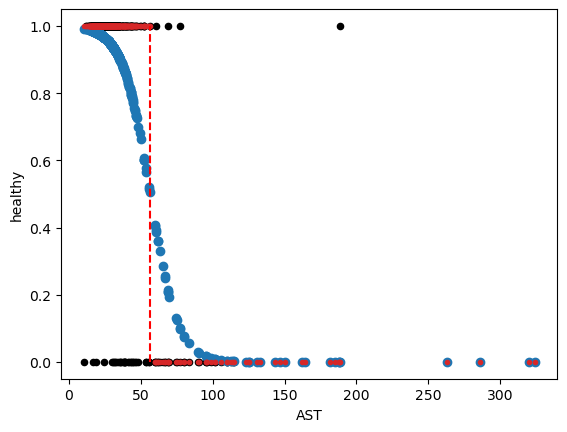

In [21]:
# Add your code below
ALS_thres = -model_AST.intercept_[0] / model_AST.coef_[0][0]
ax.plot([ALS_thres, ALS_thres], [0, 1], color='red', linestyle='--', label='Decision Threshold')
fig

#### 9. Calculate and plot the ROC curve for the predictions. 

ROC Curves summarise the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

Use the new axis for the plot, using `ax_roc.plot()`. Limit the plot range to valid values, between zero and one.

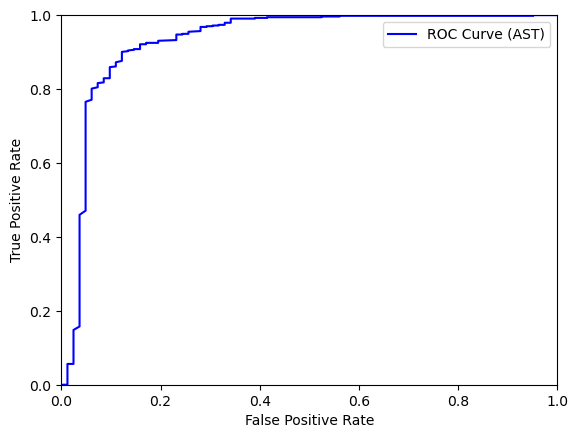

In [24]:
from sklearn.metrics import roc_curve
fig_roc, ax_roc = plt.subplots()
# Add your code below
ROC = roc_curve(y, Y_prob)
ax_roc.plot(ROC[0], ROC[1], color='blue', label='ROC Curve (AST)')
ax_roc.set_xlim([0, 1])
ax_roc.set_ylim([0, 1])
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.legend()


## Analysis of multivariate logistic regression model

#### Now, we will use all the input variables.

Let's start by uncommenting the cell below and inspecting the first 3 lines of our `df_clean` DataFrame.

In [25]:
df_clean.head(3)

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,healthy
0,32,True,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1
1,32,True,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1
2,32,True,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1


#### 10. Create a logistic regression model using all input columns from the clean data frame. 

#### Optimization algorithms can perform better with normalized input variables. To normalize the input features of your model (`X`), create a new variable called `X_norm` and use `X_norm` when training your model called `full_model`.

*Hint:  Use the z-score transformation $$\frac{x - \mu}{\sigma}$$ with the  `mean()` and `std()` methods.*

In [26]:
# Add your code below
X = df_clean.drop(columns=["healthy"])
X_norm = (X - X.mean()) / X.std()
y = df_clean["healthy"]
full_model = logreg(X_norm, y)

#### 11. Calculate the prediction probabilities. 

#### Plot the histograms of the prediction probabilities, separately for healthy cases and for unhealthy cases. Do you think the model is any good?

Set the numbers of bins to 30 (`bins=30`), use the `step` histogram type (`histtype='step'`), and set the density mode to on (`density=True`).

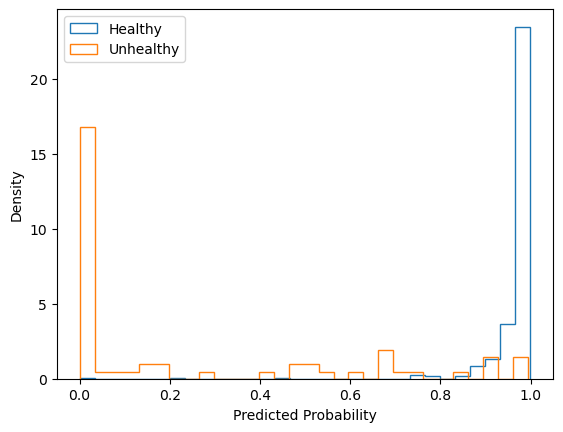

In [27]:
# Add your code below
Y_prob2 = full_model.predict_proba(X_norm)[:, 1]
plt.hist(Y_prob2[y == 1], bins=30, histtype='step', density=True, label='Healthy')
plt.hist(Y_prob2[y == 0], bins=30, histtype='step', density=True, label='Unhealthy')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend()
plt.show()


#### The ROC curve indicate the false positive and negative error rates for different choices of decision thresholds, varying from zero to one.

#### 12. Calculate the ROC for the full model.

#### Superimpose the result over the ROC for the `ALS` model, reusing the `ax_roc` axis above. 

####  Which model has better predictions?

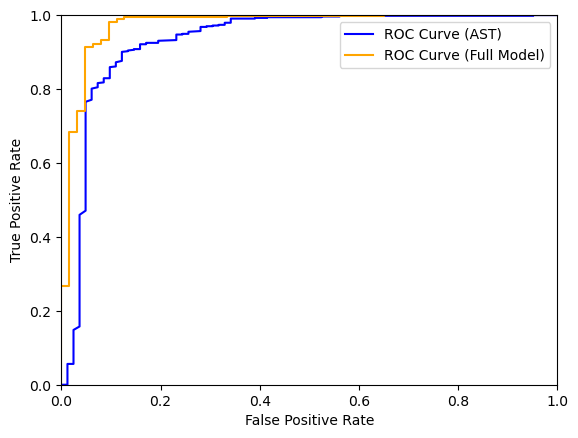

In [28]:
# Add your code below
# Calculate ROC curve for the full model
ROC2 = roc_curve(y, Y_prob2)
ax_roc.plot(ROC2[0], ROC2[1], color='orange', label='ROC Curve (Full Model)')
ax_roc.legend()
fig_roc

#### 13. Calculate the confusion matrix for the predictions using a 50% threshold. What's the error probability for healthy cases (false negatives) and unhealthy cases (false positives)?

You can review the elements of a confusion matrix in [link](https://www.nbshare.io/notebook/626706996/Learn-And-Code-Confusion-Matrix-With-Python/).

#### Notice that false positives and false negatives have very different probabilities. Think about why this is the case.

*Hint: Remember the imbalance in number of healthy and unhealthy samples.*

In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate predicted labels using 0.5 threshold
y_pred2 = (Y_prob2 > 0.5).astype(int)

# Compute confusion matrix
CM = confusion_matrix(y, y_pred2)

# Calculate error probabilities
# CM layout: [[TN, FP], [FN, TP]]
false_neg = CM[1, 0] / (CM[1, 0] + CM[1, 1])  # False negative rate (unhealthy predicted as healthy)
false_pos = CM[0, 1] / (CM[0, 0] + CM[0, 1])  # False positive rate (healthy predicted as unhealthy)


Once you have implemented the confusion matrix and the error probabilities for healthy and unhealthy cases, uncomment and run the cell below to inspect these values:

In [ ]:
print(CM)
print(false_neg)
print(false_pos)

[[ 46  17]
 [  3 523]]
0.005703422053231939
0.2698412698412698


#### 14. Calculate and print the decision probability threshold that would give same error probability for false positives and false negatives. 

*Hint: Find where in ROC curve false negatives become larger than false positives, using the `np.where()` function. Then use the third element of the ROC output (`ROC2[2]`), which tells the probability threshold at that point of the ROC curve.*

In [31]:
# Add your code below
# Calculate FPR, TPR, and thresholds from ROC2
fpr = ROC2[0]
tpr = ROC2[1]
thresholds = ROC2[2]

# False negative rate is 1 - TPR
fnr = 1 - tpr

# Find the index where the difference between FPR and FNR is minimized
index_roc = np.argmin(np.abs(fpr - fnr))
decision_thres = thresholds[index_roc]


When you have calculated `decision_thres`, uncomment the cell below to print it out:

In [32]:
decision_thres

np.float64(0.917104953219727)

#### 15. Mark over the ROC curve the point corresponding to the balanced error choice above.

#### Use `ax_roc.plot()` to plot over the ROC figure above. Plot a single marker by plotting the x and y values of the ROC curve in `ROC2` for the correct index. Use the plotting argument `gx` for a green X marker.

#### Also, calculate the ROC point for the 50% decision threshold considered above. Mark it as a red X marker in the same figure.

#### Which decision threshold is preferable? What would this preference depend on?

*Hint: Think about what is worse, false positive or false negatives?*

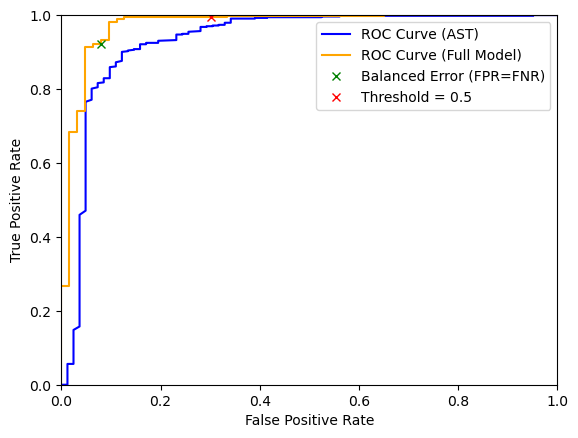

In [33]:
# Add your code below
# Find the ROC index for the 0.5 threshold (closest value)
ROC_index_05 = np.argmin(np.abs(thresholds - 0.5))

# Plot the balanced error point (green X)
ax_roc.plot(fpr[index_roc], tpr[index_roc], 'gx', label='Balanced Error (FPR=FNR)')

# Plot the 0.5 threshold point (red X)
ax_roc.plot(fpr[ROC_index_05], tpr[ROC_index_05], 'rx', label='Threshold = 0.5')

ax_roc.legend()
fig_roc

## Implementing the model from scratch

Most machine learning models are trained with gradient descent, updating model parameters with small changes in the direction that reduces the training loss. 

#### To learn in detail what goes on when we use libraries to train our model,  we will now implement the gradient descent algorithm from scratch and compare the results with the scikit-learn package model. 

#### We give you here the gradient and loss functions for the logistic regression model.

In [34]:
sigma = lambda u: 1/(1+np.exp(-u))
def gradient(w,x,y):
    y_prob = sigma(x@w)
    return np.dot(x.T, (y_prob - y))/len(y)

def loss(w,x,y):
    y_prob = sigma(x@w)
    return -(y*np.log(y_prob)+(1-y)*np.log(1-y_prob)).mean()

#### 16. Implement a function that takes the input and output of the logistic regression model and fits it using gradient descent. 

Use random Gaussian initialization (with unit variance), no regularization, learning rate of 2., and 200 gradient descent steps. 

Also, calculate the total loss at each step. Return the final weight parameters and the total loss time series.

In [ ]:
np.random.seed(0)
# Add your code below
def fit(X, y, steps=200, lr=2.0):
    n, d = X.shape
    w = np.random.randn(d)
    loss_t = []
    for t in range(steps):
        grad = gradient(w, X, y)
        w = w - lr * grad
        loss_t.append(loss(w, X, y))
    return w, np.array(loss_t)


#### 17. Fit the model to our clean and normalized inputs. 

#### Calculate and print the final weights, named `w`, and plot the loss over time, named `loss_t`. 

#### Does it learn over time? Has it nearly converged?

Remember to add a constant column to the input for the bias parameter.

Final weights: [ 3.59367522  0.09425416  0.30893019  1.01211581  1.42142925  0.49642705
 -2.33646261 -1.11616644 -0.42803688  0.70625341 -0.65606097 -1.88816686
 -0.17404143]


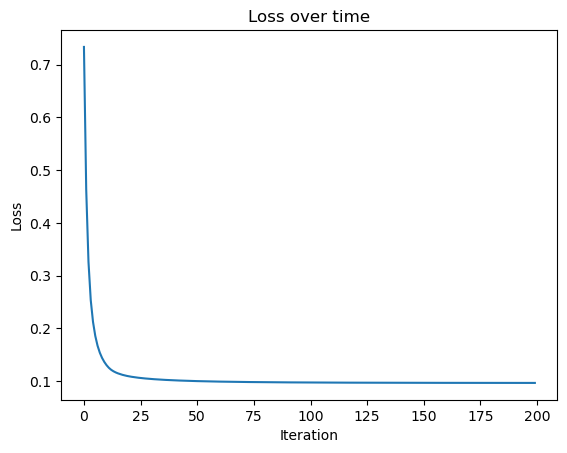

In [36]:
# Add your code below
# Prepare input with bias column
X_np = X_norm.values
X_bias = np.hstack([np.ones((X_np.shape[0], 1)), X_np])  # Add bias column
y_np = y.values

# Fit the model
w, loss_t = fit(X_bias, y_np)

# Print final weights
print("Final weights:", w)

# Plot loss over time
plt.plot(loss_t)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss over time")
plt.show()


#### 18. Calculate and plot the probability predictions histograms for healthy and unhealthy samples. 

#### Use the same histogram properties as above

#### Has this model learned well?

*Hint: the output probability of the logistic regression model is $p(x=1) = \sigma(w^T x-b)$*.

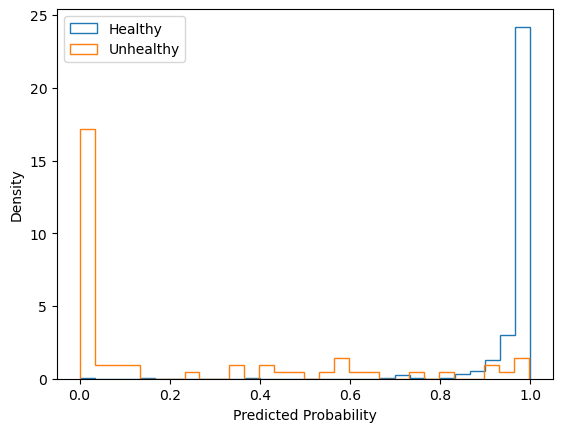

In [37]:
# Add your code below
# Calculate predicted probabilities using the learned weights
y_prob3 = sigma(X_bias @ w)

# Plot histograms for healthy and unhealthy samples
plt.hist(y_prob3[y_np == 1], bins=30, histtype='step', density=True, label='Healthy')
plt.hist(y_prob3[y_np == 0], bins=30, histtype='step', density=True, label='Unhealthy')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend()
plt.show()


#### 19. Compare the coefficients learned with our model and the scikit-learn model above. 

#### Make a scatter plot  using `plt.scatter`, with the vector of coefficients of each of the model as arguments. 

#### As a reference, plot a black dashed line on the main diagonal of the plot (i.e. where x=y). 

*Hint: Use `plt.plot([a,a],[b,b])` for some values `a` and `b`, and `k--` as argument.* 

#### Also, calculate and print the correlation between these two vectors, using the method `np.corrcoef()`, named `correlation`. 

#### Are the two models similar? Why should they be different, similar or identical?

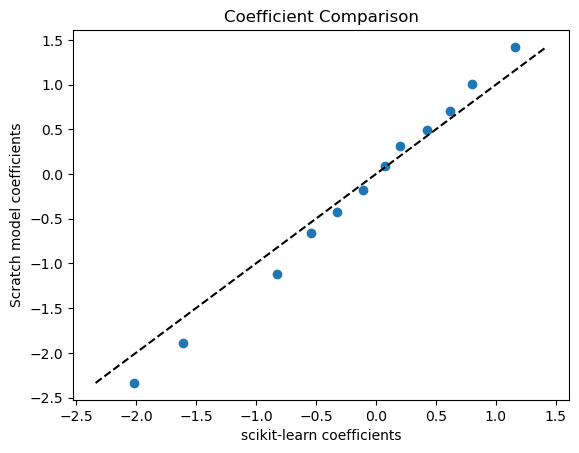

Correlation between coefficients: 0.9986980995864264


In [38]:
# Add your code below
# Get coefficients (excluding bias) from both models
w_scratch = w[1:]  # Exclude bias term from custom model
w_sklearn = full_model.coef_.flatten()  # scikit-learn model coefficients

# Scatter plot of coefficients
plt.scatter(w_sklearn, w_scratch)
plt.xlabel('scikit-learn coefficients')
plt.ylabel('Scratch model coefficients')

# Plot diagonal reference line
min_val = min(w_sklearn.min(), w_scratch.min())
max_val = max(w_sklearn.max(), w_scratch.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--')

plt.title('Coefficient Comparison')
plt.show()

# Calculate and print correlation
correlation = np.corrcoef(w_sklearn, w_scratch)[0, 1]
print("Correlation between coefficients:", correlation)
